Extinction Profile
=====================

Loading the image and defining profile connectivity
--------------------------------------------------------

Image dimensions: 550x690 pixels
Nb. of extrema used to compute the profile:
[64, 32, 16, 8, 4, 2, 1]


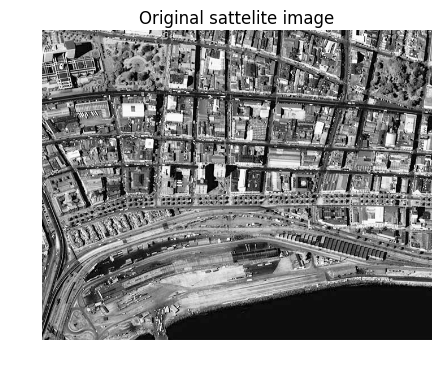

In [21]:
# This makes plots appear in the notebook
%matplotlib inline 

import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import siamxt  

# Loading the image.
# Make sure the image you read is either uint8 or uint16
data = np.asarray(Image.open("./Sample-images/sattelite.jpg").convert("L"))
print "Image dimensions: %dx%d pixels" %data.shape

#Displaying the image
fig = plt.figure()
plt.imshow(data, cmap='Greys_r')
plt.axis('off')
plt.title("Original sattelite image")

#Structuring element. connectivity-4
Bc = np.zeros((3,3),dtype = bool)
Bc[1,:] = True
Bc[:,1] = True

# Parameters used to compute the extinction profile
nextrema =  [int(2**jj) for jj in xrange(7)][::-1]
print "Nb. of extrema used to compute the profile:"
print nextrema

# Array to store the profile
H,W = data.shape
Z = 2*len(nextrema)+1
ep = np.zeros((H,W,Z))

Min-tree Profile
------------------

In [22]:
#Negating the image
max_value = data.max()
data_neg = (max_value - data)

# Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(data_neg,Bc)

# Area attribute extraction and computation of area extinction values
area = mxt.node_array[3,:]
Aext = mxt.computeExtinctionValues(area,"area")
    
# Min-tree profile
i = len(nextrema) - 1
for n in nextrema:
    mxt2 = mxt.clone()
    mxt2.extinctionFilter(Aext,n)
    ep[:,:,i] = max_value - mxt2.getImage()
    i-=1

# Putting the original image in the profile    
i = len(nextrema)
ep[:,:,i] = data
i +=1


Max-tree Profile
------------------

In [23]:
#Building the max-tree
mxt = siamxt.MaxTreeAlpha(data,Bc)

# Area attribute extraction and computation of area extinction values
area = mxt.node_array[3,:]
Aext = mxt.computeExtinctionValues(area,"area")
    
# Max-tree profile
for n in nextrema:
    mxt2 = mxt.clone()
    mxt2.extinctionFilter(Aext,n)
    ep[:,:,i] = mxt2.getImage()
    i+=1



Displaying the profile mosaic
------------------------------

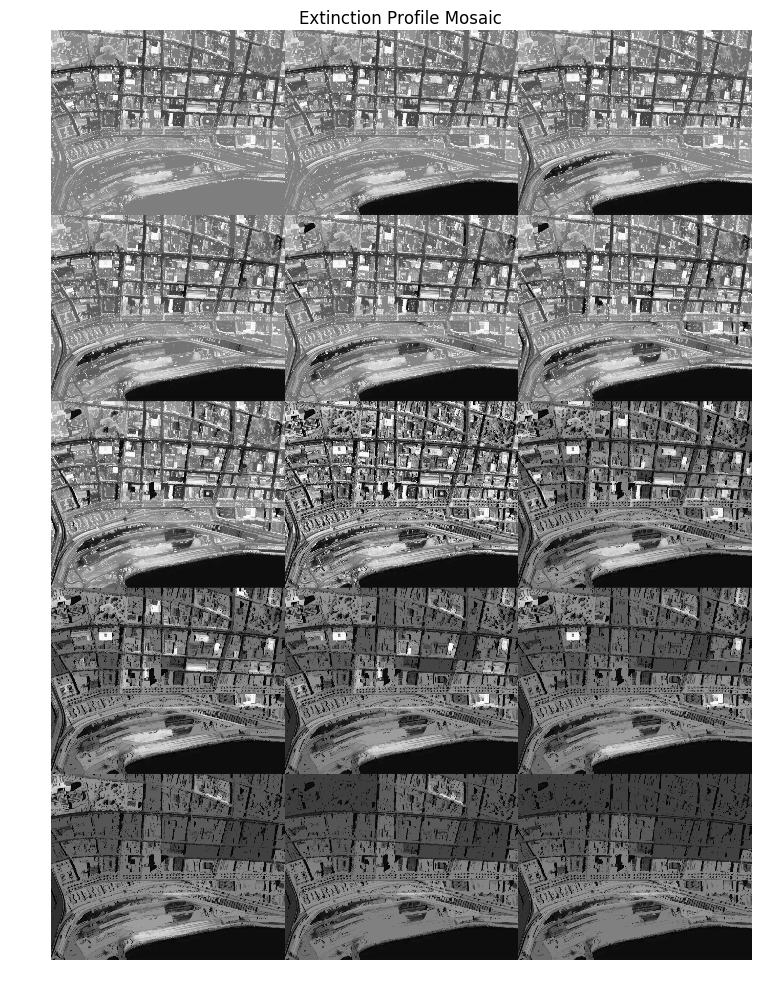

In [24]:
# Number of cloumns in the mosaic
N = 3

# Computing the dimensions of the mosiac image
H2 = Z/N
if (Z%N != 0):
    H2+=1
H2 = H2*H    
W2 = N*W

# Mosaic image initialization
mosaic = np.zeros((H2,W2), dtype = ep.dtype)

i,j = 0,0
for ii in xrange(Z):
    mosaic[i*H:(i+1)*H,j*W:(j+1)*W] = ep[:,:,ii]
    j+=1
    if (j%N == 0):
        j = 0
        i+=1
plt.rcParams['figure.figsize'] = 16, 12             
#Displaying the profile mosaic
fig = plt.figure()
plt.imshow(mosaic, cmap='Greys_r')
plt.axis('off')
plt.title("Extinction Profile Mosaic")